In [1]:
from FaceLoader import FaceLoader
from keras.models import load_model
from SocialProcessor import SocialProcessor
import cv2
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import os
import keras.backend.tensorflow_backend as tb
tb._SYMBOLIC_SCOPE.value = True
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import json
import mysql.connector

from IPython.display import Image


%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "./IMG_6874.JPG"
loader = FaceLoader(url)
loader.downloadImg()

In [3]:
images = loader.load_and_align_image()

In [4]:
len(images)

1

In [5]:
ind = 0

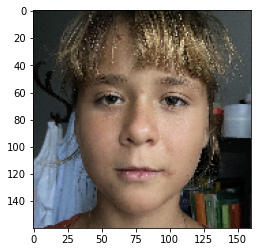

In [6]:
imshow(images[ind])

In [7]:
model_path = 'keras-facenet-master/model/keras/model/facenet_keras.h5'
model = load_model(model_path)

/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [8]:
embs = loader.calc_embs(model=model, images=images)

In [9]:
len(embs)

1

In [10]:
conn = mysql.connector.connect(user='face', host="localhost", password="Hr3mI3PM5JlFWrub", database='global_scrape', port=8889, collation="utf8mb4_general_ci")

In [11]:
processor = SocialProcessor(conn, model)

In [ ]:
matches_all = processor.findMatches(embs[ind], batch=4096, threshold=1)

In [ ]:
matches = matches_all[:100]

In [ ]:
np.array(matches).shape

In [ ]:
# settings
ncols = 3
nrows = len(matches) // ncols + int(len(matches) % ncols != 0)
figsize = [3*ncols, 3*nrows]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    if i>=len(matches):
        break
    img = plt.imread('./fragments/' + matches[i][-3] + '.png')
    axi.imshow(img)
    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    # write row/col indices as axes' title for identification
    axi.set_title(str(matches[i][-2]) + "\n" +str(matches[i][-1]) + "\n" + str(matches[i][3]))
    axi.set_xticks([])
    axi.set_yticks([])

plt.tight_layout(True)
plt.show()
